In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
f = np.load('mnist.npz')

x_train = f['x_train']
y_train = f['y_train']
x_test  = f['x_test' ]
y_test  = f['y_test' ]

In [4]:
x_train = np.reshape( x_train, (60000,28,28,1) ) / 255.
x_test  = np.reshape( x_test , (10000,28,28,1) ) / 255.

In [5]:
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test ]

In [6]:
from keras.layers import Input, Conv2D, Flatten, Dense

x = Input(shape=(28,28,1))
h = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
h = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(h)
h = Flatten()(h)
h = Dense(32, activation='relu')(h)
h = Dense(32, activation='relu')(h)
y = Dense(10, activation='softmax')(h)

Using TensorFlow backend.


In [7]:
from keras.models import Model

cnn = Model(inputs=x, outputs=y)

In [8]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total para

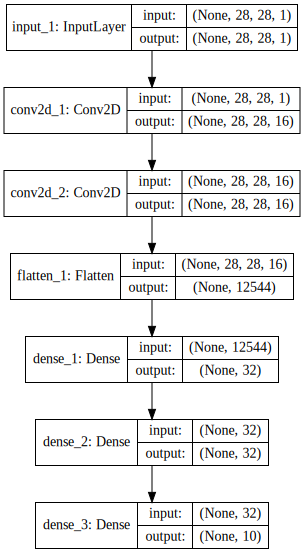

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cnn, show_shapes=True).create(prog='dot',format='svg'))

In [10]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'],)

In [11]:
hist = cnn.fit(x=x_train, y=y_train, epochs=5,validation_split=0.1,)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 109s - loss: 0.2303 - acc: 0.9294 - val_loss: 0.0970 - val_acc: 0.9735
Epoch 2/5
54000/54000 [==============================] - 105s - loss: 0.0869 - acc: 0.9734 - val_loss: 0.0755 - val_acc: 0.9798
Epoch 3/5
54000/54000 [==============================] - 110s - loss: 0.0618 - acc: 0.9814 - val_loss: 0.0672 - val_acc: 0.9822
Epoch 4/5
54000/54000 [==============================] - 108s - loss: 0.0471 - acc: 0.9854 - val_loss: 0.0739 - val_acc: 0.9827
Epoch 5/5
54000/54000 [==============================] - 111s - loss: 0.0405 - acc: 0.9871 - val_loss: 0.0838 - val_acc: 0.9833


In [14]:
%matplotlib inline

Text(0,0.5,'loss')

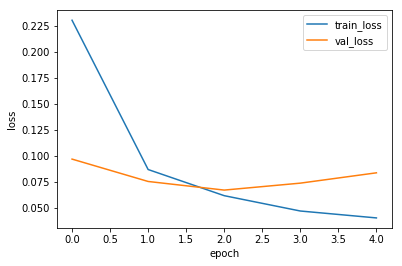

In [15]:
plt.plot(hist.epoch, hist.history['loss'    ], label='train_loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss'  )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0,0.5,'acc')

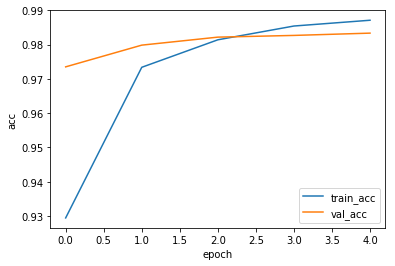

In [16]:
plt.plot(hist.epoch, hist.history['acc'    ], label='train_acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc'  )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')

In [17]:
cnn.evaluate( x=x_test, y=y_test )

10000/10000 [==============================] - 5s     


[0.080410611777656599, 0.97860000000000003]

In [19]:
pred = cnn.predict(x_test).argmax(axis=1)

TypeError: Invalid dimensions for image data

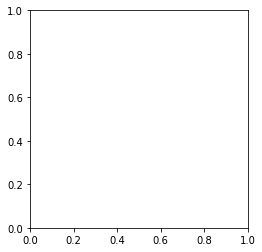

In [20]:
plt.imshow(x_test[0])
plt.title (str(pred[0]))